# Import Library

In [1]:
! pip install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 11.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Data Prepation

In [3]:
dataset = pd.read_csv("reviews.csv")
dataset.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [4]:
dataset.drop(['Time_submitted','Total_thumbsup','Reply'], axis=1, inplace=True)
dataset.head()

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1


In [5]:
def ratings(rating):
  if rating == 5 or rating == 4:
    return "Positif"
  elif rating == 3 :
    return "Neutral"
  else :
    return "Negative"

dataset['Rating'] = dataset['Rating'].apply(ratings)
dataset.head()

,Review,Rating
0,"Great music service, the audio is high quality...",Positif
1,Please ignore previous negative rating. This a...,Positif
2,"This pop-up ""Get the best Spotify experience o...",Positif
3,Really buggy and terrible to use as of recently,Negative
4,Dear Spotify why do I get songs that I didn't ...,Negative


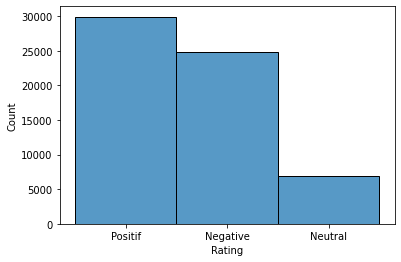

In [6]:
sns.histplot(dataset['Rating'])
plt.show()

# Data Pre-Procesing

In [7]:
# Case Folding 

def lower(review):
  review = review.lower()
  return review

dataset['Review'] = dataset['Review'].apply(lower)
dataset.head()

,Review,Rating
0,"great music service, the audio is high quality...",Positif
1,please ignore previous negative rating. this a...,Positif
2,"this pop-up ""get the best spotify experience o...",Positif
3,really buggy and terrible to use as of recently,Negative
4,dear spotify why do i get songs that i didn't ...,Negative


In [8]:
# Remove Puncutuation
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z]')

def repunch(review):
    review = clean_spcl.sub('', review)
    review = clean_symbol.sub(' ', review)
    return review

dataset['Review'] = dataset['Review'].apply(repunch)
dataset.head()

,Review,Rating
0,great music service the audio is high quality ...,Positif
1,please ignore previous negative rating this a...,Positif
2,this pop up get the best spotify experience o...,Positif
3,really buggy and terrible to use as of recently,Negative
4,dear spotify why do i get songs that i didn t ...,Negative


In [9]:
# Remove Double Whitespace

def rewhitespace(review):
    corrected = str(review)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")

dataset['Review'] = dataset['Review'].apply(rewhitespace)
dataset.head()

,Review,Rating
0,great music service the audio is high quality ...,Positif
1,please ignore previous negative rating this ap...,Positif
2,this pop up get the best spotify experience on...,Positif
3,really buggy and terrible to use as of recently,Negative
4,dear spotify why do i get songs that i didn t ...,Negative


In [10]:
# Remove Stopwords

stopword = set(stopwords.words('english'))
def stopwords(review):
    review = ' '.join(word for word in review.split() if word not in stopword)
    return review

dataset['Review'] = dataset['Review'].apply(stopwords)
dataset.head()

,Review,Rating
0,great music service audio high quality app eas...,Positif
1,please ignore previous negative rating app sup...,Positif
2,pop get best spotify experience android 12 ann...,Positif
3,really buggy terrible use recently,Negative
4,dear spotify get songs put playlist shuffle play,Negative


In [11]:
# Tokenizing

from nltk.tokenize import word_tokenize

def token(review):
  review = word_tokenize(review)
  return review

dataset['Review'] = dataset['Review'].apply(token)
dataset.head()

,Review,Rating
0,"[great, music, service, audio, high, quality, ...",Positif
1,"[please, ignore, previous, negative, rating, a...",Positif
2,"[pop, get, best, spotify, experience, android,...",Positif
3,"[really, buggy, terrible, use, recently]",Negative
4,"[dear, spotify, get, songs, put, playlist, shu...",Negative


# Data Evaluation

In [12]:
# Proses TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
review_tf = tf.fit_transform(dataset['Review'].astype('U'))
review_tf

<61594x25999 sparse matrix of type '<class 'numpy.float64'>'
	with 875089 stored elements in Compressed Sparse Row format>

In [13]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(review_tf, dataset['Rating'], train_size = 0.8, test_size = 0.2, random_state = 42)

In [14]:
# ALgoritma Naive Bayes MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

mnb_accuracy = accuracy_score(y_test,predicted)

print("MultinomialNB Accuracy: ", accuracy_score(y_test, predicted))
print("MultinomialNB Precision: ", precision_score(y_test, predicted, average = "macro"))
print("MultinomialNB Recall: ", recall_score(y_test, predicted, average = "macro"))
print("MultinomialNB F1 Score: ", f1_score(y_test, predicted, average = "macro"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print("----------------------------------------------------------")
print(classification_report(y_test, predicted, zero_division = 0))

MultinomialNB Accuracy:  0.7692994561246854
MultinomialNB Precision:  0.5687664691963717
MultinomialNB Recall:  0.5803736917094331
MultinomialNB F1 Score:  0.5436474743238228
confusion matrix:
 [[4341    3  565]
 [ 975    1  436]
 [ 861    2 5135]]
----------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.70      0.88      0.78      4909
     Neutral       0.17      0.00      0.00      1412
     Positif       0.84      0.86      0.85      5998

    accuracy                           0.77     12319
   macro avg       0.57      0.58      0.54     12319
weighted avg       0.71      0.77      0.72     12319



In [15]:
# ALgoritma Naive Bayes BernoulliNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = BernoulliNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

bnb_accuracy = accuracy_score(y_test, predicted)

print("BernoulliNB Accuracy: ", accuracy_score(y_test, predicted))
print("BernoulliNB Precision: ", precision_score(y_test, predicted, average = "macro"))
print("BernoulliNB Recall: ", recall_score(y_test, predicted, average = "macro"))
print("BernoulliNB F1 Score: ", f1_score(y_test, predicted, average = "macro"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print("----------------------------------------------------------")
print(classification_report(y_test, predicted, zero_division = 0))

BernoulliNB Accuracy:  0.7347187271694131
BernoulliNB Precision:  0.581505122896098
BernoulliNB Recall:  0.5681724730531147
BernoulliNB F1 Score:  0.5584601182629143
confusion matrix:
 [[3749  141 1019]
 [ 788  105  519]
 [ 620  181 5197]]
----------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.73      0.76      0.74      4909
     Neutral       0.25      0.07      0.11      1412
     Positif       0.77      0.87      0.82      5998

    accuracy                           0.73     12319
   macro avg       0.58      0.57      0.56     12319
weighted avg       0.69      0.73      0.71     12319



In [16]:
model = {'Model':['Multinomial NB', 
                  'Bernoulli NB'],
         'Score':[mnb_accuracy, bnb_accuracy]
         }
model_df = pd.DataFrame(model)
model_df

,Model,Score
0,Multinomial NB,0.769299
1,Bernoulli NB,0.734719


<function matplotlib.pyplot.show(*args, **kw)>

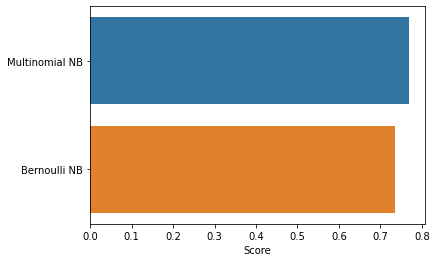

In [17]:
sns.barplot(data=model_df, y='Model', x='Score')
plt.ylabel('')
plt.show

# Data Prediction

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [27]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

test_reviews =['Great Application', 'This app so bad']
pred = mnb.predict(tf.transform(test_reviews))
pred_transformed = le.inverse_transform(pred).tolist()

In [28]:
result = pd.DataFrame({'Reviews':test_reviews, 
                       'Outcome': pred_transformed})
result

,Reviews,Outcome
0,Great Application,Positif
1,This app so bad,Negative
